In [1]:
import pandas as pd

# Load the provided Excel file to examine its contents
file_path = 'DATA dSAT2.xlsx'
xls = pd.ExcelFile(file_path)

# Check the sheet names to identify where the "Tidy" data is located
xls.sheet_names


# Load the 'Tidy' sheet to analyze the data
df_tidy = pd.read_excel(file_path, sheet_name='Tidy')

# Display the first few rows of the dataset to understand its structure
df_tidy.head()


,Column1,Phenotype,Animal_No,Stimulus_Duration,Distractor_Condition,HITS,MISSES,FA,CR,OM
0,51,ST,377.0,25,SAT,1.000000,5.333333,0.916667,19.083333,0.166667
1,99,ST,377.0,25,dSAT,1.625000,5.375000,NaN,NaN,0.000000
2,147,ST,377.0,50,SAT,2.166667,4.583333,NaN,NaN,0.000000
3,219,ST,377.0,50,dSAT,1.500000,5.875000,3.750000,16.500000,0.000000
4,294,ST,377.0,500,SAT,3.944444,2.333333,NaN,NaN,0.166667


In [13]:
import pandas as pd
from pingouin import mixed_anova, pairwise_tests

# Load your data
file_path = 'DATA dSAT2.xlsx'
xls = pd.ExcelFile(file_path)
tidy_df = pd.read_excel(file_path, sheet_name='Tidy')

# Clean the data and focus on the relevant columns
tidy_df_clean = tidy_df.dropna(subset=['FA'])
tidy_df_clean = tidy_df_clean.rename(columns={'Distractor_Condition': 'Condition', 'Animal_No': 'Animal', 'FA': 'FalseAlarm'})

# Conduct a mixed-design ANOVA
anova_results = mixed_anova(dv='FalseAlarm', between='Phenotype', within='Condition', subject='Animal', data=tidy_df_clean)

# Post-hoc pairwise comparisons with Bonferroni correction
post_hoc_results = pairwise_tests(dv='FalseAlarm', between='Phenotype', within='Condition', subject='Animal', data=tidy_df_clean, padjust='bonf')

# Calculate generalized eta-squared for effect size
anova_results['generalized_eta_squared'] = anova_results['np2'] / (1 - anova_results['np2'] + (len(tidy_df_clean) - 1))

print(anova_results)
print(post_hoc_results)


        Source          SS  DF1  DF2          MS           F         p-unc  \
0    Phenotype    8.619873    2   37    4.309936    0.695291  5.053299e-01   
1    Condition  385.161579    1   37  385.161579  183.901650  6.259636e-16   
2  Interaction    0.466760    2   37    0.233380    0.111431  8.948520e-01   

        np2  eps  generalized_eta_squared  
0  0.036222  NaN                 0.000453  
1  0.832505  1.0                 0.010516  
2  0.005987  NaN                 0.000075  
                Contrast Condition    A     B Paired Parametric          T  \
0              Condition         -  SAT  dSAT   True       True -13.880983   
1              Phenotype         -   GT    IN  False       True   0.133521   
2              Phenotype         -   GT    ST  False       True   1.166793   
3              Phenotype         -   IN    ST  False       True   0.877454   
4  Condition * Phenotype       SAT   GT    IN  False       True  -0.262272   
5  Condition * Phenotype       SAT   GT    

C:\Users\pfh3221\AppData\Local\Temp\ipykernel_2448\2426286587.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Phenotype", y="FalseAlarm", data=tidy_df_clean, ci='sd')
C:\Users\pfh3221\AppData\Local\Temp\ipykernel_2448\2426286587.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Condition", y="FalseAlarm", data=tidy_df_clean, ci='sd')


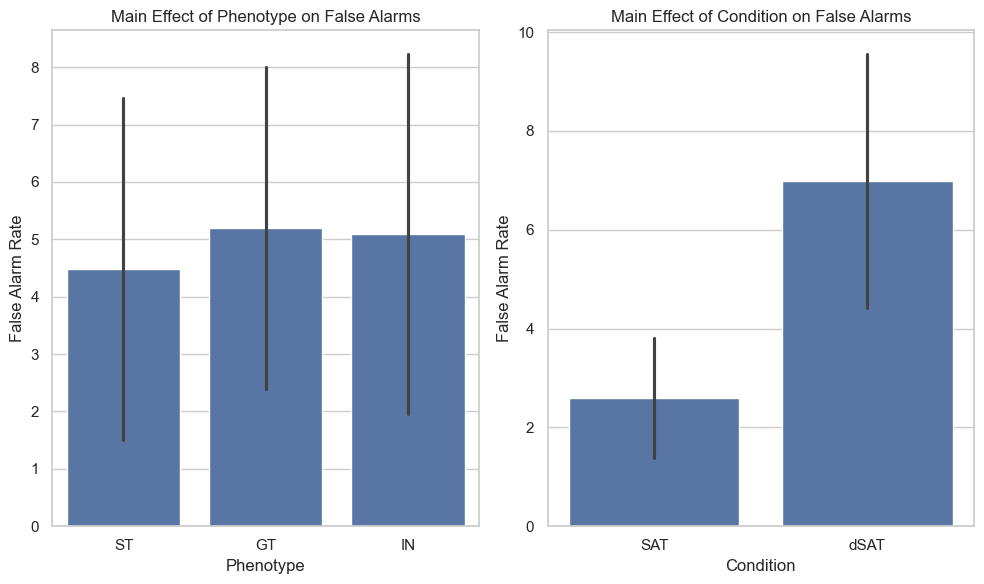

C:\Users\pfh3221\AppData\Local\Temp\ipykernel_2448\2426286587.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="Condition", y="FalseAlarm", hue="Phenotype", data=tidy_df_clean, ci='sd', dodge=True, markers=["o", "s"], capsize=0.1)


KeyError: 'IN'

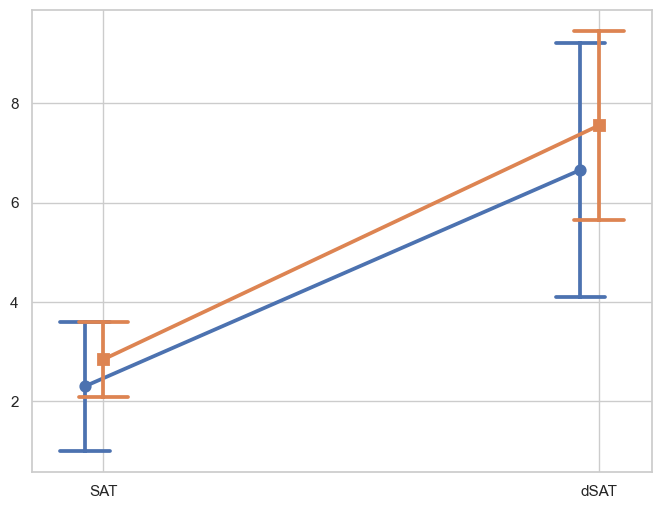

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, ensure the data is clean and ready for visualization
tidy_df_clean = tidy_df.dropna(subset=['FA'])
tidy_df_clean = tidy_df_clean.rename(columns={'Distractor_Condition': 'Condition', 'Animal_No': 'Animal', 'FA': 'FalseAlarm'})

# Set up the plot aesthetics
sns.set(style="whitegrid")

# Create a figure for the bar plots of main effects
plt.figure(figsize=(10, 6))

# 1. Main Effect of Phenotype
plt.subplot(1, 2, 1)
sns.barplot(x="Phenotype", y="FalseAlarm", data=tidy_df_clean, ci='sd')
plt.title("Main Effect of Phenotype on False Alarms")
plt.ylabel("False Alarm Rate")
plt.xlabel("Phenotype")

# 2. Main Effect of Distractor Condition
plt.subplot(1, 2, 2)
sns.barplot(x="Condition", y="FalseAlarm", data=tidy_df_clean, ci='sd')
plt.title("Main Effect of Condition on False Alarms")
plt.ylabel("False Alarm Rate")
plt.xlabel("Condition")

plt.tight_layout()
plt.show()

# Now create an interaction plot
plt.figure(figsize=(8, 6))
sns.pointplot(x="Condition", y="FalseAlarm", hue="Phenotype", data=tidy_df_clean, ci='sd', dodge=True, markers=["o", "s"], capsize=0.1)
plt.title("Interaction Plot: Phenotype and Condition")
plt.ylabel("False Alarm Rate")
plt.xlabel("Condition")
plt.legend(title="Phenotype")
plt.show()


C:\Users\pfh3221\AppData\Local\Temp\ipykernel_2448\1330656364.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="Condition", y="FalseAlarm", hue="Phenotype", data=tidy_df_clean, ci='sd', dodge=True, capsize=0.1)


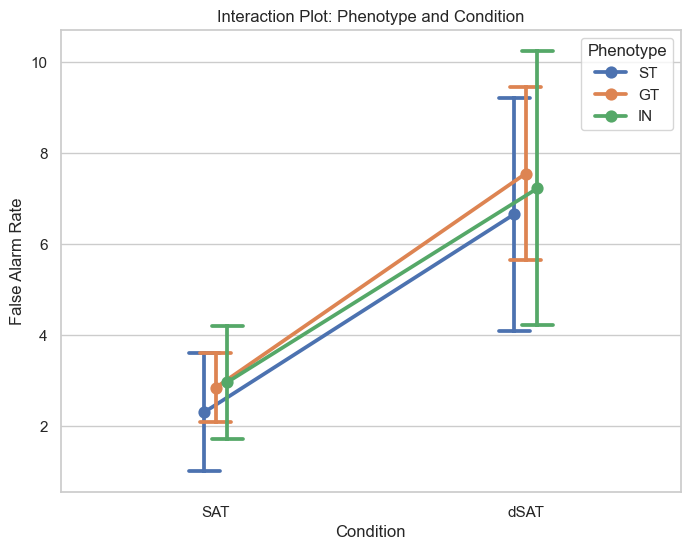

In [15]:
# Fixing the interaction plot without specifying markers explicitly
plt.figure(figsize=(8, 6))
sns.pointplot(x="Condition", y="FalseAlarm", hue="Phenotype", data=tidy_df_clean, ci='sd', dodge=True, capsize=0.1)
plt.title("Interaction Plot: Phenotype and Condition")
plt.ylabel("False Alarm Rate")
plt.xlabel("Condition")
plt.legend(title="Phenotype")
plt.show()


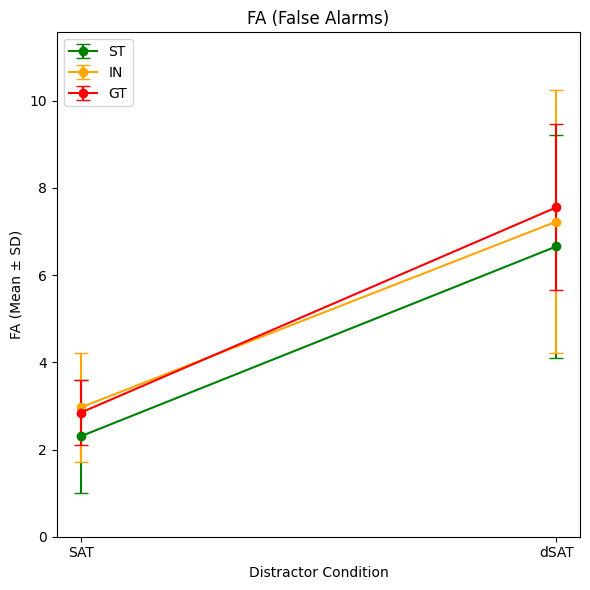

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'DATA dSAT2.xlsx'

# Load the data from the 'Tidy' sheet
tidy_data = pd.read_excel(file_path, sheet_name='Tidy')

# Filter out the relevant columns for 'FA'
filtered_data = tidy_data[['Distractor_Condition', 'Phenotype', 'FA']]

# Calculate the mean and standard deviation of 'FA' for each combination of Distractor_Condition and Phenotype
summary_fa = filtered_data.groupby(['Distractor_Condition', 'Phenotype']).agg(
    mean_fa=('FA', 'mean'),
    std_fa=('FA', 'std')
).reset_index()

# Define the phenotype colors
phenotypes = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Set up the plot configuration for FA
plt.figure(figsize=(6, 6))

# Create the plot for 'FA' with mean and standard deviation
for phenotype, color in phenotypes.items():
    subset = summary_fa[summary_fa['Phenotype'] == phenotype]
    plt.errorbar(subset['Distractor_Condition'], subset['mean_fa'], yerr=subset['std_fa'], 
                 label=phenotype, color=color, marker='o', capsize=5)

plt.title('FA (False Alarms)')
plt.xlabel('Distractor Condition')
plt.ylabel('FA (Mean ± SD)')
plt.ylim(0, summary_fa['mean_fa'].max() + summary_fa['std_fa'].max() + 1)
plt.legend()

plt.tight_layout()
plt.show()
